In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

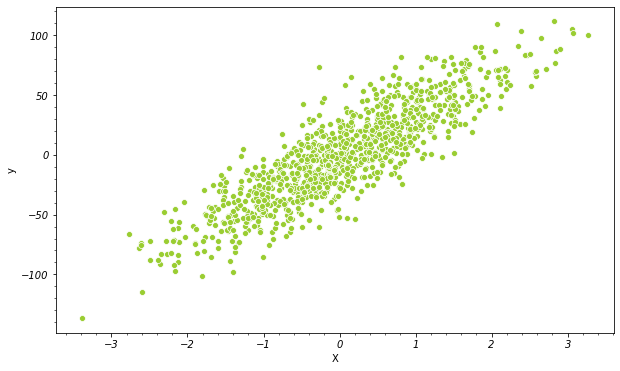

In [3]:
X, y, coef = make_regression(n_samples=1000,n_features=1,n_informative=1, noise=20,coef=True, \
                random_state=22)

X_df = pd.DataFrame(X,columns=['X'])
y_df = pd.DataFrame(y,columns=['y'])

data_df = pd.concat([X_df,y_df],axis=1)

plt.figure(figsize=(10,6))
sns.scatterplot(x=data_df['X'],y=data_df['y'],color='yellowgreen')
plt.minorticks_on()
plt.xlabel("X")
plt.ylabel("y")
plt.xticks(style='oblique',color='k')
plt.yticks(style='oblique',color='k')
plt.show()

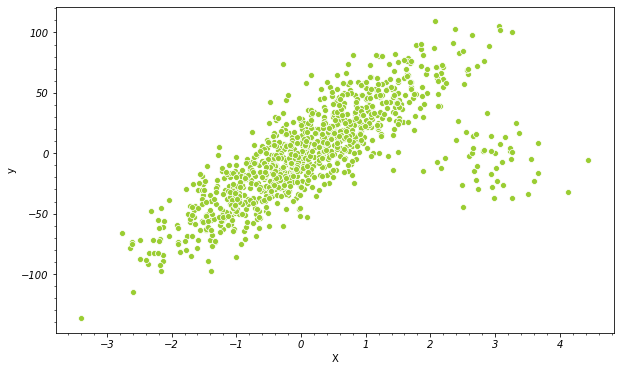

In [4]:
# Introduce some outliers on the existing dataset
np.random.seed(12)

# Number of outliers
n_outliers = 50;val=3;mul_val1=0.5;mul_val2=20

data_df['X'].iloc[0:n_outliers] = val + mul_val1 * np.random.normal(size=n_outliers)
data_df['y'].iloc[0:n_outliers] = -val + mul_val2 * np.random.normal(size=n_outliers)

plt.figure(figsize=(10,6))
sns.scatterplot(data_df['X'],data_df['y'],color='yellowgreen')
plt.minorticks_on()
plt.xlabel("X")
plt.ylabel("y")
plt.xticks(style='oblique',color='k')
plt.yticks(style='oblique',color='k')
plt.show()

In [5]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2,tol=0.001,max_iter=500,fit_intercept=True,solver='saga',random_state=23)
ridge.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=2,tol =0.00001,max_iter=1000,fit_intercept=True,selection='cyclic',random_state=23)
lasso.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

Lasso(alpha=2, random_state=23, tol=1e-05)

In [ ]:
'''
# Applying RANSAC on a less noisy dataset
# case 1
    - RANSAC Estimator — Linear Regression
    - Min_samples = 50
    - Max_trials = 1000
    - Loss = Absolute Loss
    - Residual_threshold


Linear Regression Coefficeint: [[23.0835977]]
RANSAC Regression Coefficeint: [[33.07503633]]


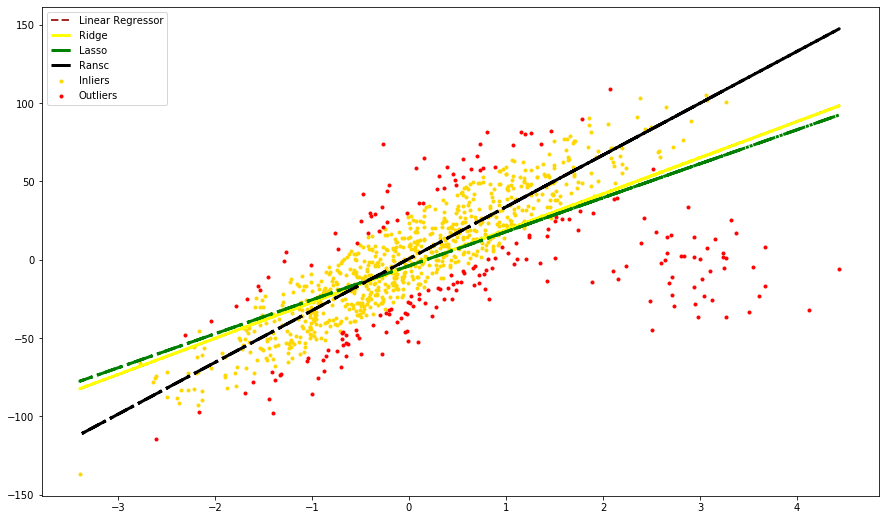

In [7]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

ransac = RANSACRegressor(base_estimator=LinearRegression(),min_samples=50, max_trials=1000,loss='absolute_loss')

ransac.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Comparing Linear and RANSAC Coeff
print("Linear Regression Coefficeint:",lr.coef_)
print("RANSAC Regression Coefficeint:",ransac.estimator_.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Plotting the Inliers
plt.scatter(data_df['X'][inlier_mask], data_df['y'][inlier_mask], color='gold', marker='.',label='Inliers')

# Plotting the Outlier
plt.scatter(data_df['X'][outlier_mask], data_df['y'][outlier_mask],color='red', marker='.',label='Outliers')

# Plotting the Linear Regression best-fit line
plt.plot(data_df['X'],lr.predict(data_df['X'].to_numpy().reshape(-1,1)), color='brown',linewidth='2', linestyle='--',\
        label='Linear Regressor')

# Plotting the Ridge Regression best-fit line
plt.plot(data_df['X'], ridge.predict(data_df['X'].to_numpy().reshape(-1,1)), color='yellow', linewidth=3, \
         linestyle='-.',label='Ridge')

# Plotting the Lasso Regression best-fit line
plt.plot(data_df['X'], lasso.predict(data_df['X'].to_numpy().reshape(-1,1)), color='green', linewidth=3, \
         linestyle='-.',label='Lasso')

# Plotting the Ransc Regression best-fit line
plt.plot(data_df['X'], ransac.predict(data_df['X'].to_numpy().reshape(-1,1)), color='black', linewidth=3, \
         linestyle='-.',label='Ransc')

plt.legend()


In [ ]:
'''
# case 2
    RANSAC Estimator — Trained Ridge Regressor
    Min_samples = 50
    Max_trials = 500
    Loss = Absolute Loss

Linear Regression Coefficeint: [[23.0835977]]
RANSAC Regression Coefficeint: [[32.93080001]]


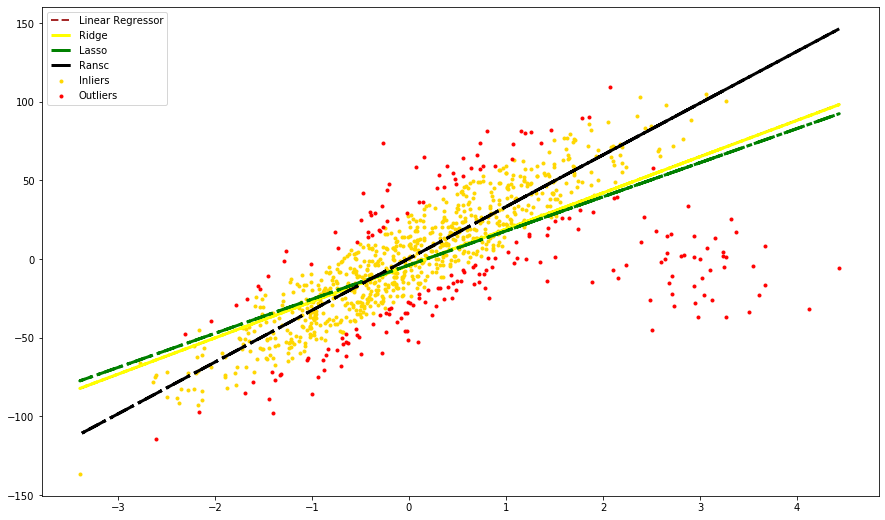

In [8]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

ransac = RANSACRegressor(base_estimator=ridge,min_samples=50, max_trials=500,loss='absolute_loss')

ransac.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Comparing Linear and RANSAC Coeff
print("Linear Regression Coefficeint:",lr.coef_)
print("RANSAC Regression Coefficeint:",ransac.estimator_.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Plotting the Inliers
plt.scatter(data_df['X'][inlier_mask], data_df['y'][inlier_mask], color='gold', marker='.',label='Inliers')

# Plotting the Outlier
plt.scatter(data_df['X'][outlier_mask], data_df['y'][outlier_mask],color='red', marker='.',label='Outliers')

# Plotting the Linear Regression best-fit line
plt.plot(data_df['X'],lr.predict(data_df['X'].to_numpy().reshape(-1,1)), color='brown',linewidth='2', linestyle='--',\
        label='Linear Regressor')

# Plotting the Ridge Regression best-fit line
plt.plot(data_df['X'], ridge.predict(data_df['X'].to_numpy().reshape(-1,1)), color='yellow', linewidth=3, \
         linestyle='-.',label='Ridge')

# Plotting the Lasso Regression best-fit line
plt.plot(data_df['X'], lasso.predict(data_df['X'].to_numpy().reshape(-1,1)), color='green', linewidth=3, \
         linestyle='-.',label='Lasso')

# Plotting the Ransc Regression best-fit line
plt.plot(data_df['X'], ransac.predict(data_df['X'].to_numpy().reshape(-1,1)), color='black', linewidth=3, \
         linestyle='-.',label='Ransc')

plt.legend()


In [ ]:
'''
Case 3:
    RANSAC Estimator — Trained Lasso Regressor
    Min_samples = 50
    Max_trials = 500
    Loss = Squared Loss


Linear Regression Coefficeint: [[23.0835977]]
RANSAC Regression Coefficeint: [0.]


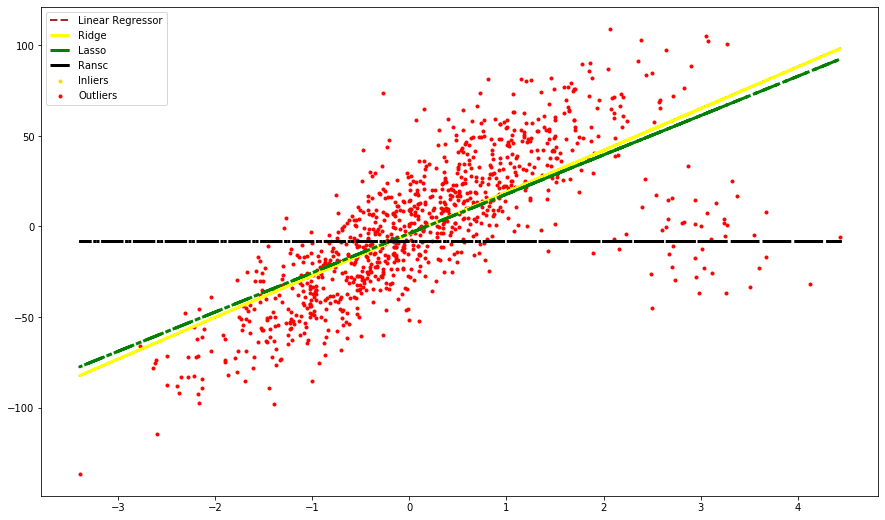

In [13]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

ransac = RANSACRegressor(base_estimator=lasso,min_samples=5, max_trials=500,loss='squared_loss')

ransac.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Comparing Linear and RANSAC Coeff
print("Linear Regression Coefficeint:",lr.coef_)
print("RANSAC Regression Coefficeint:",ransac.estimator_.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Plotting the Inliers
plt.scatter(data_df['X'][inlier_mask], data_df['y'][inlier_mask], color='gold', marker='.',label='Inliers')

# Plotting the Outlier
plt.scatter(data_df['X'][outlier_mask], data_df['y'][outlier_mask],color='red', marker='.',label='Outliers')

# Plotting the Linear Regression best-fit line
plt.plot(data_df['X'],lr.predict(data_df['X'].to_numpy().reshape(-1,1)), color='brown',linewidth='2', linestyle='--',\
        label='Linear Regressor')

# Plotting the Ridge Regression best-fit line
plt.plot(data_df['X'], ridge.predict(data_df['X'].to_numpy().reshape(-1,1)), color='yellow', linewidth=3, \
         linestyle='-.',label='Ridge')

# Plotting the Lasso Regression best-fit line
plt.plot(data_df['X'], lasso.predict(data_df['X'].to_numpy().reshape(-1,1)), color='green', linewidth=3, \
         linestyle='-.',label='Lasso')

# Plotting the Ransc Regression best-fit line
plt.plot(data_df['X'], ransac.predict(data_df['X'].to_numpy().reshape(-1,1)), color='black', linewidth=3, \
         linestyle='-.',label='Ransc')

plt.legend()


In [ ]:
'''
Case 3:
    RANSAC Estimator — Trained Lasso Regressor
    Min_samples = 50
    Max_trials = 5
    Loss = Squared Loss


Linear Regression Coefficeint: [[23.0835977]]
RANSAC Regression Coefficeint: [-0.]


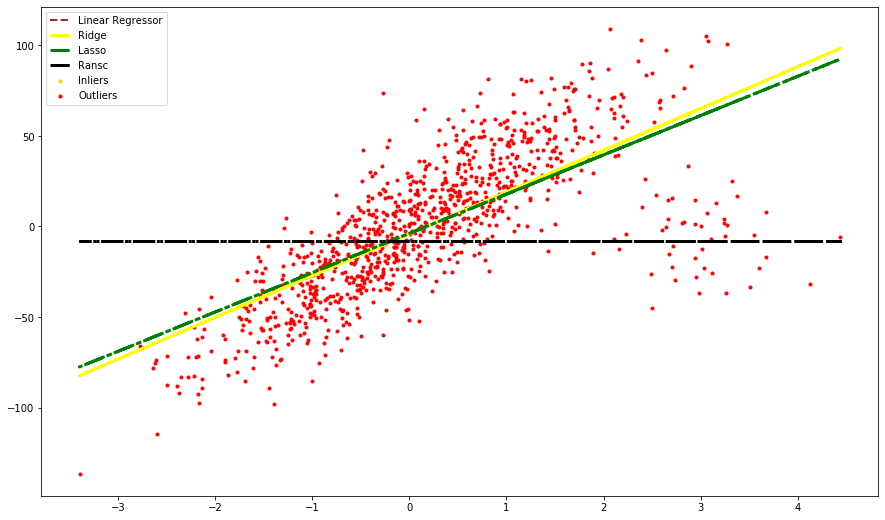

In [23]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

ransac = RANSACRegressor(base_estimator=lasso,min_samples=5, max_trials=500,loss='squared_loss')

ransac.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Comparing Linear and RANSAC Coeff
print("Linear Regression Coefficeint:",lr.coef_)
print("RANSAC Regression Coefficeint:",ransac.estimator_.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Plotting the Inliers
plt.scatter(data_df['X'][inlier_mask], data_df['y'][inlier_mask], color='gold', marker='.',label='Inliers')

# Plotting the Outlier
plt.scatter(data_df['X'][outlier_mask], data_df['y'][outlier_mask],color='red', marker='.',label='Outliers')

# Plotting the Linear Regression best-fit line
plt.plot(data_df['X'],lr.predict(data_df['X'].to_numpy().reshape(-1,1)), color='brown',linewidth='2', linestyle='--',\
        label='Linear Regressor')

# Plotting the Ridge Regression best-fit line
plt.plot(data_df['X'], ridge.predict(data_df['X'].to_numpy().reshape(-1,1)), color='yellow', linewidth=3, \
         linestyle='-.',label='Ridge')

# Plotting the Lasso Regression best-fit line
plt.plot(data_df['X'], lasso.predict(data_df['X'].to_numpy().reshape(-1,1)), color='green', linewidth=3, \
         linestyle='-.',label='Lasso')

# Plotting the Ransc Regression best-fit line
plt.plot(data_df['X'], ransac.predict(data_df['X'].to_numpy().reshape(-1,1)), color='black', linewidth=3, \
         linestyle='-.',label='Ransc')

plt.legend()
